<h1>Выведите результаты работы библиотечной модели - в численном и в графическом виде.<h1>

Точность: 0.99
F1-очки: 0.99


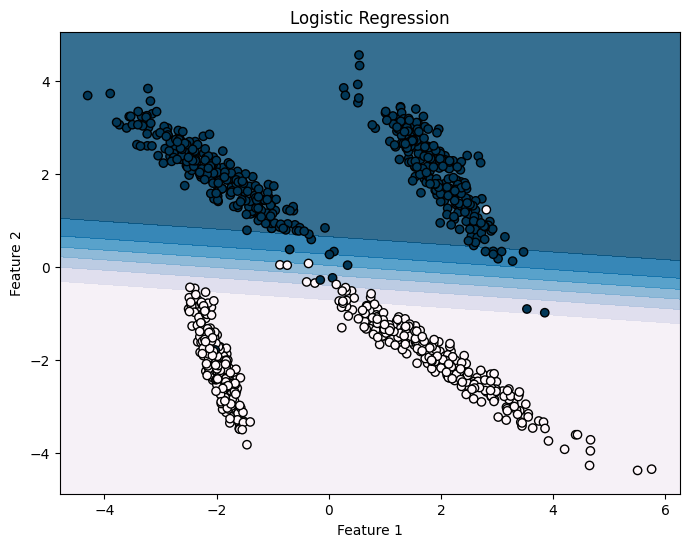

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

X,y = make_classification (n_samples=1000, n_features=2, n_informative=2,n_redundant=0, n_classes=2, class_sep=2, random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=20)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Точность: {accuracy:.2f}")
print(f"F1-очки: {f1:.2f}")


plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.PuBu, alpha=.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PuBu, edgecolors='k')
plt.title("Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

<h1>Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.<h1>

In [33]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Генерирование данных для обучения модели
X,y = make_classification (n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, class_sep=2, random_state=1)

# Использование различных значений скорости обучения
learning_rates = [0.0005, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]

for lr in learning_rates:
    model = LogisticRegression(solver='liblinear', C=1/lr)
    converged = False
    while not converged and lr >= 1e-8:
        model.fit(X, y)
        converged = np.all(np.abs(model.coef_) < 1e7)
        lr /= 10
        model.set_params(C=1/lr)
    # Вывод обученных весов и смещения
        print("Weights:", model.coef_)
        print("Bias:", model.intercept_)
    print("Learning rate:", lr)

Weights: [[3.38521779 0.45714167]]
Bias: [-0.2905448]
Learning rate: 5e-05
Weights: [[3.3853567  0.45717103]]
Bias: [-0.29056774]
Learning rate: 1e-05
Weights: [[3.3850442  0.45710499]]
Bias: [-0.29051612]
Learning rate: 0.0001
Weights: [[3.38365722 0.4568119 ]]
Bias: [-0.29028705]
Learning rate: 0.0005
Weights: [[3.38192789 0.45644647]]
Bias: [-0.29000145]
Learning rate: 0.001
Weights: [[3.36826631 0.45356002]]
Bias: [-0.28774631]
Learning rate: 0.005
Weights: [[3.35160784 0.45004132]]
Bias: [-0.28499904]
Learning rate: 0.01
Weights: [[3.23264534 0.42494829]]
Bias: [-0.2654723]
Learning rate: 0.05
Weights: [[3.11110592 0.3993916 ]]
Bias: [-0.24572428]
Learning rate: 0.1
Weights: [[2.58035413 0.28955147]]
Bias: [-0.16340846]
Learning rate: 0.5
Weights: [[2.27161646 0.22813525]]
Bias: [-0.12000019]
Learning rate: 1.0


<h1>Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.</h1>

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, add_dummy_feature

scaler = StandardScaler()

# Добавление фиктивного столбца единиц к матрице признаков
X_train = add_dummy_feature(X_train)
X_test = add_dummy_feature(X_test)


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


f1 = f1_score(y_test, y_pred)

# Вывод результатов
print(f"Точность: {accuracy:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.99
F1-score: 0.99


<h1>Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

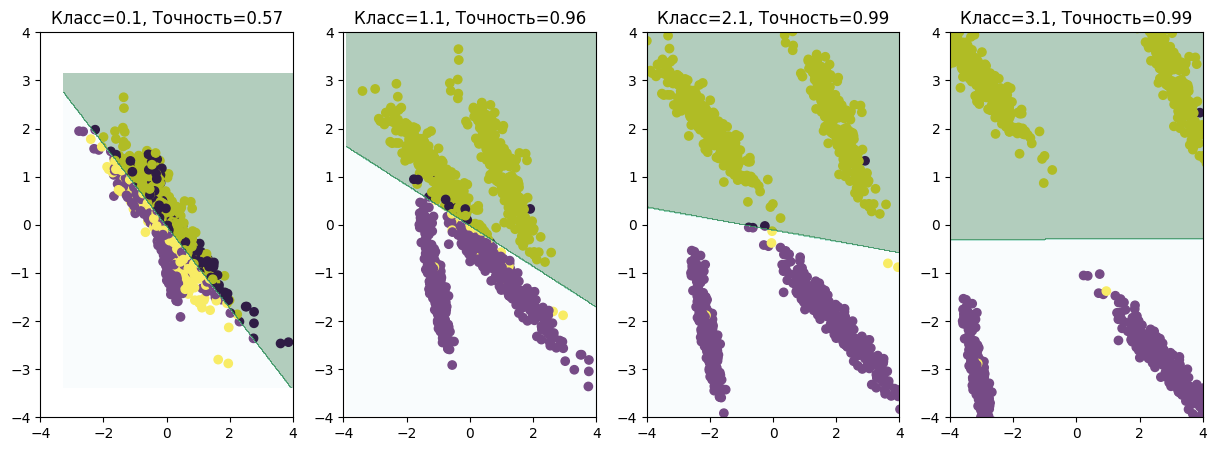

In [35]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


class_seps = [0.1, 1.1, 2.1, 3.1]
fig, axs = plt.subplots(nrows=1, ncols=len(class_seps), figsize=(15, 5))

for i, class_sep in enumerate(class_seps):
    X,y = make_classification (n_samples=1000, n_features=2,  n_informative=2, n_redundant=0, n_classes=2, class_sep=class_sep, random_state=20)


    model = LogisticRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)

    axs[i].scatter(X[:, 0], X[:, 1], c=y)
    axs[i].set_title(f"Класс={class_sep}, Точность={accuracy:.2f}")
    axs[i].set_xlim((-4, 4))
    axs[i].set_ylim((-4, 4))
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axs[i].contourf(xx, yy, Z, alpha=0.3,  cmap='BuGn')

<h1> Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

Точность: 0.99
F1-очки: 0.99


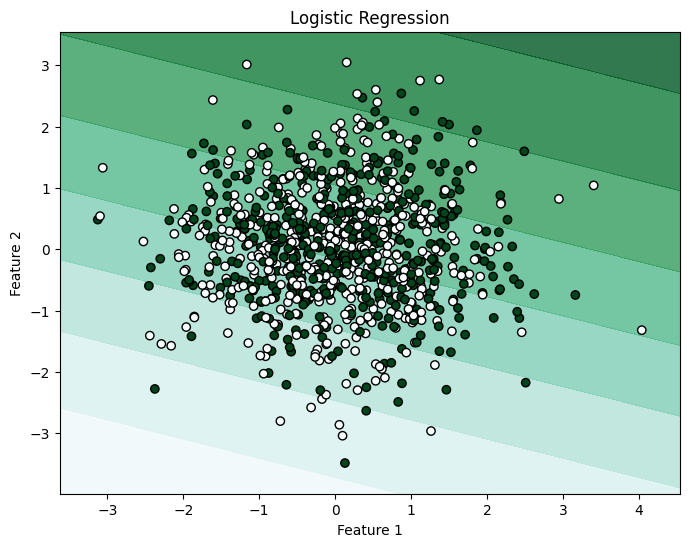

In [36]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


X,y = make_classification (n_samples=1000, n_features=10,  n_informative=2, n_redundant=0, n_classes=2, class_sep=2, random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Точность: {accuracy:.2f}")
print(f"F1-очки: {f1:.2f}")


# Визуализация результатов классификации на графике
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()),
                              np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()),
                              np.zeros_like(xx.ravel())])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.BuGn, alpha=.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.BuGn, edgecolors='k')
plt.title("Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

<h1> Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [37]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X, y = make_classification(n_samples=1000, n_features=10, n_classes=10, n_informative=5, random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Точность:", accuracy)

Точность: 0.435


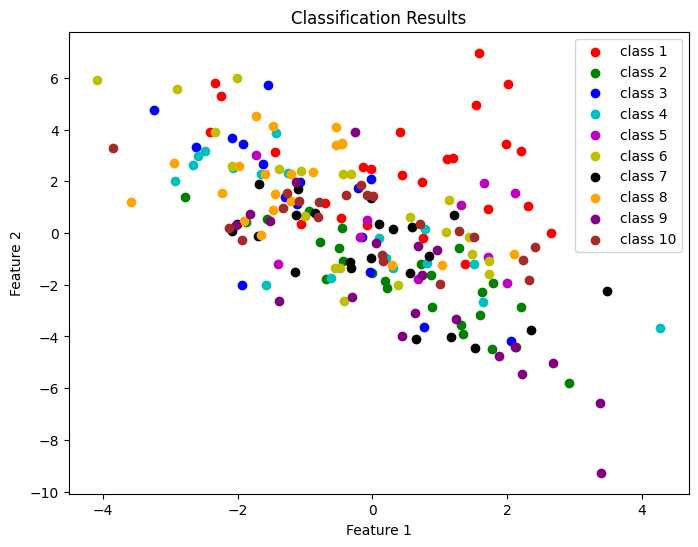

In [38]:
# Визуализируем результаты классификации на графике
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for i in range(10):
    plt.scatter(X_test[y_test==i, 0], X_test[y_test==i, 1], color=colors[i], label=f'class {i+1}')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Results')
plt.show()

<h1>Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [39]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X, y = make_classification(n_samples=1000, n_features=10, n_classes=5, n_informative=5, random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


y_pred_proba = clf.predict_proba(X_test)
print("Predicted probabilities: ")
print(y_pred_proba)

Predicted probabilities: 
[[4.40992301e-01 2.03199259e-02 1.24869143e-01 5.21511639e-03
  4.08603513e-01]
 [1.60024026e-02 4.52126443e-01 3.62186596e-02 4.76106656e-01
  1.95458382e-02]
 [1.49423774e-03 3.20845191e-01 1.65637317e-01 4.04343874e-01
  1.07679381e-01]
 [1.12726200e-01 1.23265467e-01 8.75909716e-02 6.07231213e-02
  6.15694240e-01]
 [7.73515820e-02 3.11359016e-03 7.76559375e-01 4.75507245e-03
  1.38220381e-01]
 [2.37358931e-01 1.01909681e-01 1.19019206e-01 1.58264549e-01
  3.83447633e-01]
 [5.42007708e-01 4.32099555e-03 2.88362459e-01 1.10934861e-03
  1.64199488e-01]
 [9.03556212e-02 1.06274137e-03 8.16162954e-01 8.04772780e-04
  9.16139111e-02]
 [9.82348596e-01 6.63072537e-07 2.94802696e-03 1.14865774e-07
  1.47025996e-02]
 [9.80798112e-01 2.22140909e-04 4.95664493e-03 1.62796346e-05
  1.40068227e-02]
 [2.01433767e-02 2.00726064e-01 6.97545762e-01 4.70824605e-02
  3.45023373e-02]
 [1.36418423e-02 4.73063699e-01 1.04766191e-02 4.44832355e-01
  5.79854841e-02]
 [3.89468671e-